# Import

In [1]:
import sys
print(sys.executable)

c:\Users\TTest\anaconda3\python.exe


In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import matplotlib.patches as patches

# Run

In [3]:

model = models.segmentation.deeplabv3_mobilenet_v3_large(pretrained=True).eval()


input_image = Image.open('blackpig1.jpg')
preprocess = transforms.Compose([
    transforms.Resize(320),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image).unsqueeze(0)

with torch.no_grad():
    output = model(input_tensor)['out'][0]
mask = output.argmax(0).byte().cpu().numpy()

binary_mask = (mask != 0).astype(np.uint8)

labeled, num_features = ndimage.label(binary_mask)

sizes = ndimage.sum(binary_mask, labeled, range(1, num_features + 1))
largest_label = (sizes.argmax() + 1)
pig_mask = (labeled == largest_label)

coords = np.column_stack(np.where(pig_mask))

min_row, min_col = coords.min(axis=0)
max_row, max_col = coords.max(axis=0)

pig_length_pixels = max(max_row - min_row, max_col - min_col)
print("Pig length (in pixels):", pig_length_pixels)

fig, ax = plt.subplots()
ax.imshow(pig_mask, cmap='gray')
#rect = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row,
#linewidth=2, edgecolor='r', facecolor='none')
#ax.add_patch(rect)

center_row = (min_row + max_row) // 3
ref_length = 30 
ref_start_col = min_col + (max_col - min_col - ref_length) // 2
ref_end_col = ref_start_col + ref_length
ax.plot([ref_start_col, ref_end_col], [center_row, center_row], color='red', linewidth=2, label=f'Reference Line ({ref_length} px)')

plt.title("Pig with Reference Line (short, x-axis)")
plt.axis('off')
plt.show()

reference_length_cm = 50 
pixels_per_cm = ref_length / reference_length_cm
pig_length_pixels = max(max_row - min_row, max_col - min_col)
pig_length_cm = pig_length_pixels / pixels_per_cm
print(f"Pig length: {pig_length_pixels:.2f} pixels ≈ {pig_length_cm:.2f} cm (using reference line)")

c:\Users\TTest\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\TTest\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_MobileNet_V3_Large_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Pig length (in pixels): 146


: 

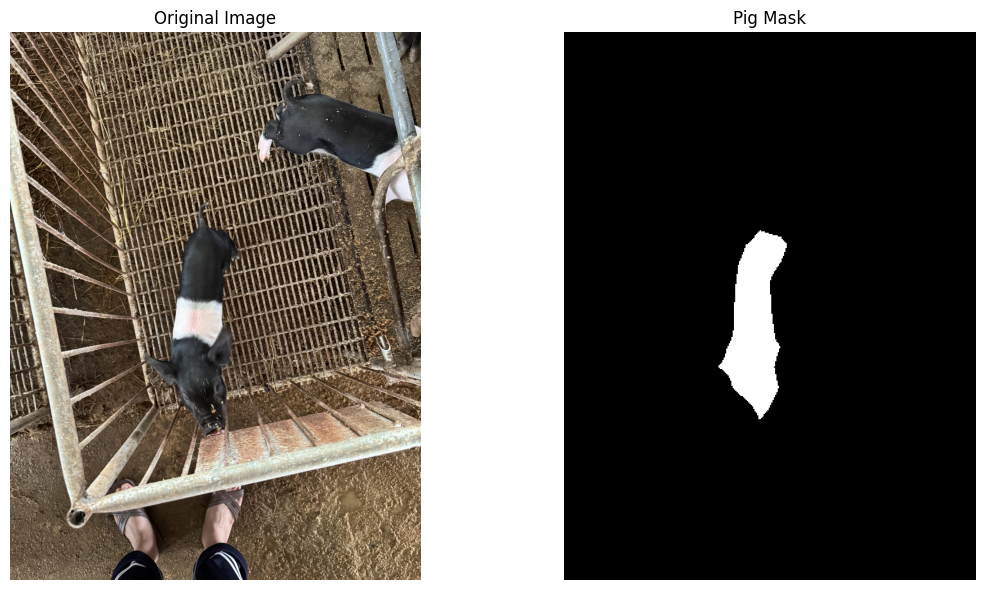

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(input_image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(pig_mask, cmap='gray')
axes[1].set_title('Pig Mask')
axes[1].axis('off')
plt.tight_layout()
plt.show()